In [2]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [7]:
!pip install scikit-image

     |████████████████████████████████| 13.0 MB 572 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 171 kB 6.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 6.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/aakashgouda/Python_Project/venv/bin/python -m pip install --upgrade pip' command.


In [19]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [24]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    print(hex_colors)
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

['#fdb82f', '#fefefe', '#02a2ea', '#75b831', '#f95327', '#f9f6d5', '#87dcf9', '#e6ce94']


[array([253.45644204, 184.88570997,  47.7103821 ]),
 array([254.41304449, 254.81196641, 254.45020097]),
 array([  2.18779607, 162.95443266, 234.99842093]),
 array([117.80725486, 184.79232949,  49.13141886]),
 array([249.88465173,  83.85392494,  39.3022412 ]),
 array([249.11876076, 246.21204819, 213.4767642 ]),
 array([135.87218045, 220.74285714, 249.04962406]),
 array([230.77279305, 206.40424506, 148.28123493])]

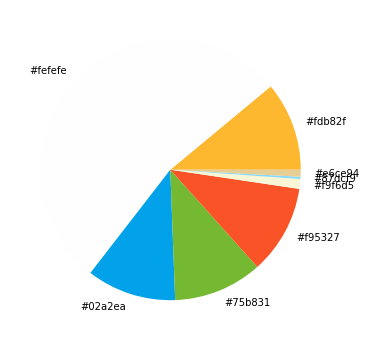

In [25]:
get_colors(get_image('sample1.jpeg'), 8, True)

In [33]:
from scipy.spatial import KDTree
from webcolors import (
    css3_hex_to_names,
    hex_to_rgb,
)
def convert_rgb_to_names(rgb_tuple):
    
    # a dictionary of all the hex and their respective names in css3
    css3_db = css3_hex_to_names
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))
    
    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return f'closest match: {names[index]}'

ImportError: cannot import name 'css3_hex_to_names' from 'webcolors' (/Users/aakashgouda/Python_Project/venv/lib/python3.7/site-packages/webcolors.py)

In [28]:
!pip install webcolors

You should consider upgrading via the '/Users/aakashgouda/Python_Project/venv/bin/python -m pip install --upgrade pip' command.


[[240 240 240]
 [240 240 240]
 [240 240 240]
 ...
 [240 240 240]
 [240 240 240]
 [240 240 240]]
[0 0 0 ... 0 0 0]
Counter({0: 280938, 1: 101564, 2: 34978})
==>>>'#eeeeee' has no defined color name in css3
==>>>'#252f92' has no defined color name in css3
==>>>'#5f7cae' has no defined color name in css3


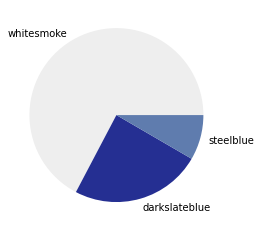

In [61]:
import cv2
import sys
import glob
import webcolors
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from collections import Counter


# Source: https://gist.github.com/kb22/f17e59a79d4fcca02188c23cca932be5#file-rgb2hex-py
def rgb2hex(c):
    return "#{:02x}{:02x}{:02x}".format(int(c[0]), int(c[1]), int(c[2]))  # format(int(c[0]), int(c[1]), int(c[2]))


def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        print("==>>>{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm


img = cv2.imread("sample2.jpeg")
img2 = img.reshape(img.shape[0] * img.shape[1], 3)
print(img2)
color = KMeans(n_clusters=3)
lbl = color.fit_predict(img2)
print(lbl)
cnt = Counter(lbl)
print(cnt)
center_color = color.cluster_centers_
ord_color = [center_color[i] for i in cnt.keys()]
hex_color = [rgb2hex(ord_color[i]) for i in cnt.keys()]
lbl_color = [hex2name(ord_color[i]) for i in cnt.keys()]
plt.pie(cnt.values(), labels=lbl_color, colors=hex_color)
plt.show()

AxesImage(54,36;334.8x217.44)
==>>>'#d79b4a' has no defined color name in css3
==>>>'#fefdfc' has no defined color name in css3
==>>>'#3b2e2e' has no defined color name in css3


[array([215.22374693, 155.10400707,  74.87061941]),
 array([254.67671813, 253.5333659 , 252.82519706]),
 array([59.13724737, 46.56305506, 46.09034612])]

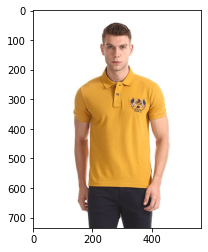

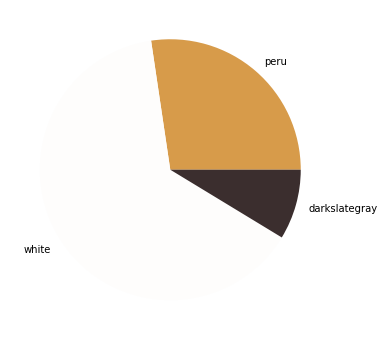

In [84]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    print(plt.imshow(image))
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    lbl_color = [hex2name(ordered_colors[i]) for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = lbl_color, colors = hex_colors)
    
    return rgb_colors

get_colors(get_image('sample3.jpeg'), 3, True)


In [70]:
webcolors.CSS3_NAMES_TO_HEX.items()

dict_items([('aliceblue', '#f0f8ff'), ('antiquewhite', '#faebd7'), ('aqua', '#00ffff'), ('aquamarine', '#7fffd4'), ('azure', '#f0ffff'), ('beige', '#f5f5dc'), ('bisque', '#ffe4c4'), ('black', '#000000'), ('blanchedalmond', '#ffebcd'), ('blue', '#0000ff'), ('blueviolet', '#8a2be2'), ('brown', '#a52a2a'), ('burlywood', '#deb887'), ('cadetblue', '#5f9ea0'), ('chartreuse', '#7fff00'), ('chocolate', '#d2691e'), ('coral', '#ff7f50'), ('cornflowerblue', '#6495ed'), ('cornsilk', '#fff8dc'), ('crimson', '#dc143c'), ('cyan', '#00ffff'), ('darkblue', '#00008b'), ('darkcyan', '#008b8b'), ('darkgoldenrod', '#b8860b'), ('darkgray', '#a9a9a9'), ('darkgrey', '#a9a9a9'), ('darkgreen', '#006400'), ('darkkhaki', '#bdb76b'), ('darkmagenta', '#8b008b'), ('darkolivegreen', '#556b2f'), ('darkorange', '#ff8c00'), ('darkorchid', '#9932cc'), ('darkred', '#8b0000'), ('darksalmon', '#e9967a'), ('darkseagreen', '#8fbc8f'), ('darkslateblue', '#483d8b'), ('darkslategray', '#2f4f4f'), ('darkslategrey', '#2f4f4f'), ('

AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


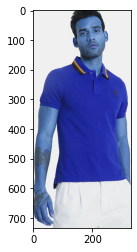

In [9]:
import cv2
import numpy as np
#img = cv2.imread("test.png")
img = cv2.imread("sample2.jpeg")
blurred = cv2.blur(img, (3,3))
canny = cv2.Canny(img, 50, 200)

## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

## crop the region
cropped = img[y1:y2, x1:x2]
cv2.imwrite("cropped.png", cropped)

tagged = cv2.rectangle(img.copy(), (x1,y1), (x2,y2), (0,255,0), 3, cv2.LINE_AA)
print(plt.imshow(tagged))
print(plt.imshow(cropped))

In [ ]:
!pip install tensorflow-compression

     |████████████████████████████████| 185 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.8 MB 18.9 MB/s eta 0:00:01
     |█▎                              | 7.7 MB 5.5 MB/s eta 0:00:34